# Plot a case

Here we pick out a case and look in detail at the results

In [1]:
import os
import pickle
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline

import flayer
import particle_evolution
import feo_thermodynamics as feot
import multiprocessing
import bulk_case_runner
import earth_model
import layer_setup

# Light blue square

In [2]:
data = bulk_case_runner.load_case_data('/Users/andreww/Code/slurry_cases/light_blue/cases_details/case_40.0_0.01.pkl')

# Some data missing from files
analysis_radii = np.linspace(data["r_icb"], data["r_icb"] + data["f_layer_thickness"],
                                     data["number_of_analysis_points"])

data["analysis_radii"] = analysis_radii  

Particle radii between 0.0163 and 9.52e-06 m


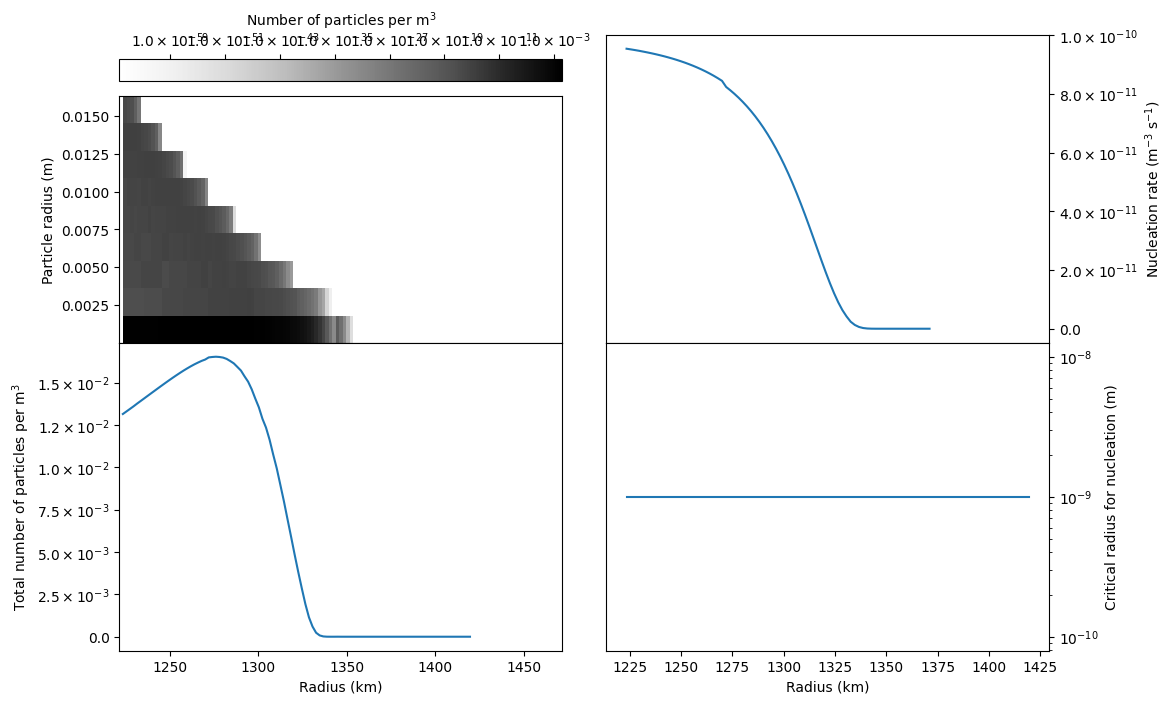

In [3]:
bulk_case_runner.plot_case_csd_nuc(logscale=True, nonuc=False, **data)


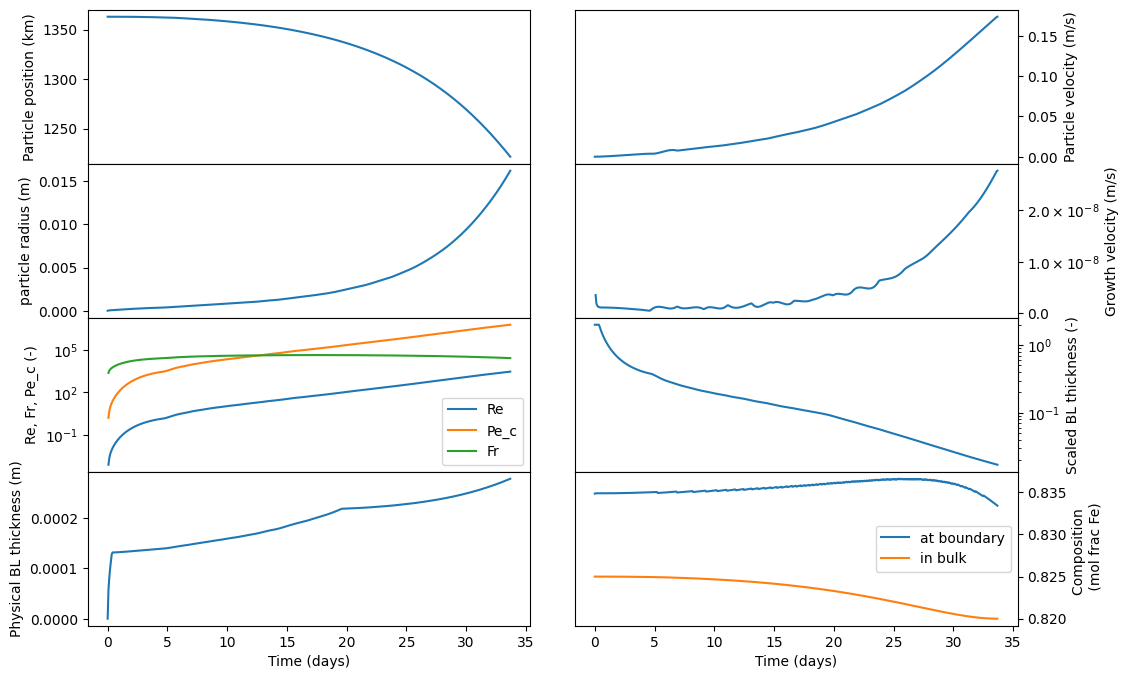

In [4]:
# Reuse general layer setup code, but we don't need many of the functions
# so we never need to rerun this (fairly expensive) function

r_icb = data["r_icb"]
r_flayer_top = data["r_icb"] + data["f_layer_thickness"]
_, adiabatic_temperature_function, _, _, _, pressure_function, gravity_function, _ \
            = layer_setup.setup_flayer_functions(data["r_icb"], data["r_cmb"],
                                                 data["f_layer_thickness"], 
                                                 data["gruneisen_parameter"], 10, 
                                                 data["xfe_outer_core"],
                                                 data["xfe_outer_core"], data["analysis_radii"])


temperature_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, adiabatic_temperature_function(r_icb)+40.0, 
            adiabatic_temperature_function(r_flayer_top))
composition_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, data["xfe_outer_core"]-0.01, data["xfe_outer_core"])


particle_evolution.plot_particle_evolution_time(data["solutions"][70], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

particle_evolution.plot_particle_evolution_time(data["solutions"][35], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

# Light blue diamond

Particle radii between 0.0234 and 9.49e-06 m


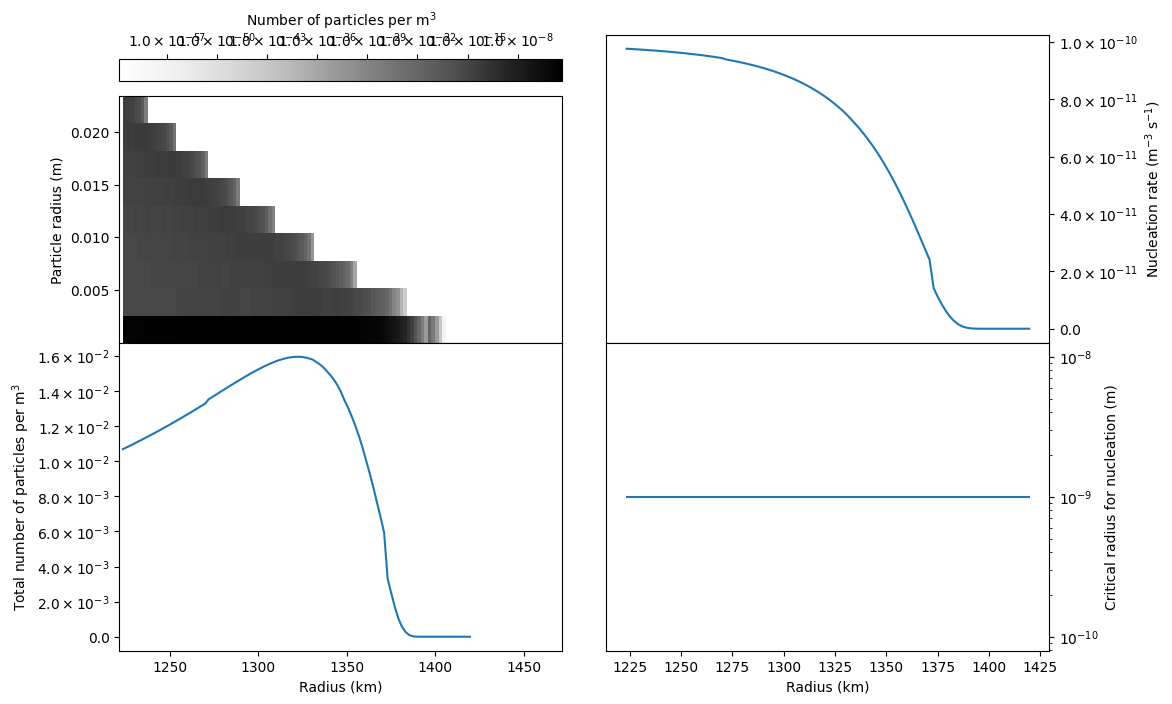

In [5]:
data = bulk_case_runner.load_case_data('/Users/andreww/Code/slurry_cases/light_blue/cases_details/case_-25.0_0.000625.pkl')

# Some data missing from files
analysis_radii = np.linspace(data["r_icb"], data["r_icb"] + data["f_layer_thickness"],
                                     data["number_of_analysis_points"])

data["analysis_radii"] = analysis_radii  

bulk_case_runner.plot_case_csd_nuc(logscale=True, nonuc=False, **data)


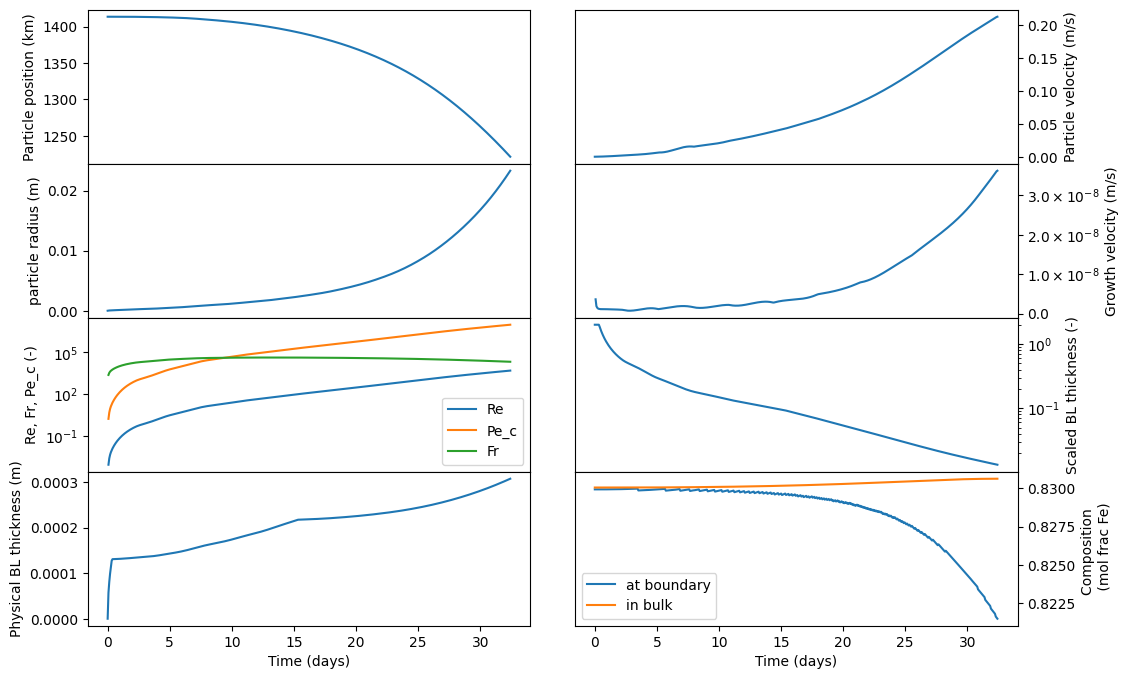

In [6]:
# Reuse general layer setup code, but we don't need many of the functions
# so we never need to rerun this (fairly expensive) function

r_icb = data["r_icb"]
r_flayer_top = data["r_icb"] + data["f_layer_thickness"]
_, adiabatic_temperature_function, _, _, _, pressure_function, gravity_function, _ \
            = layer_setup.setup_flayer_functions(data["r_icb"], data["r_cmb"],
                                                 data["f_layer_thickness"], 
                                                 data["gruneisen_parameter"], 10, 
                                                 data["xfe_outer_core"],
                                                 data["xfe_outer_core"], data["analysis_radii"])


temperature_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, adiabatic_temperature_function(r_icb)-25.0, 
            adiabatic_temperature_function(r_flayer_top))
composition_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, data["xfe_outer_core"]+0.000625, data["xfe_outer_core"])


particle_evolution.plot_particle_evolution_time(data["solutions"][95], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

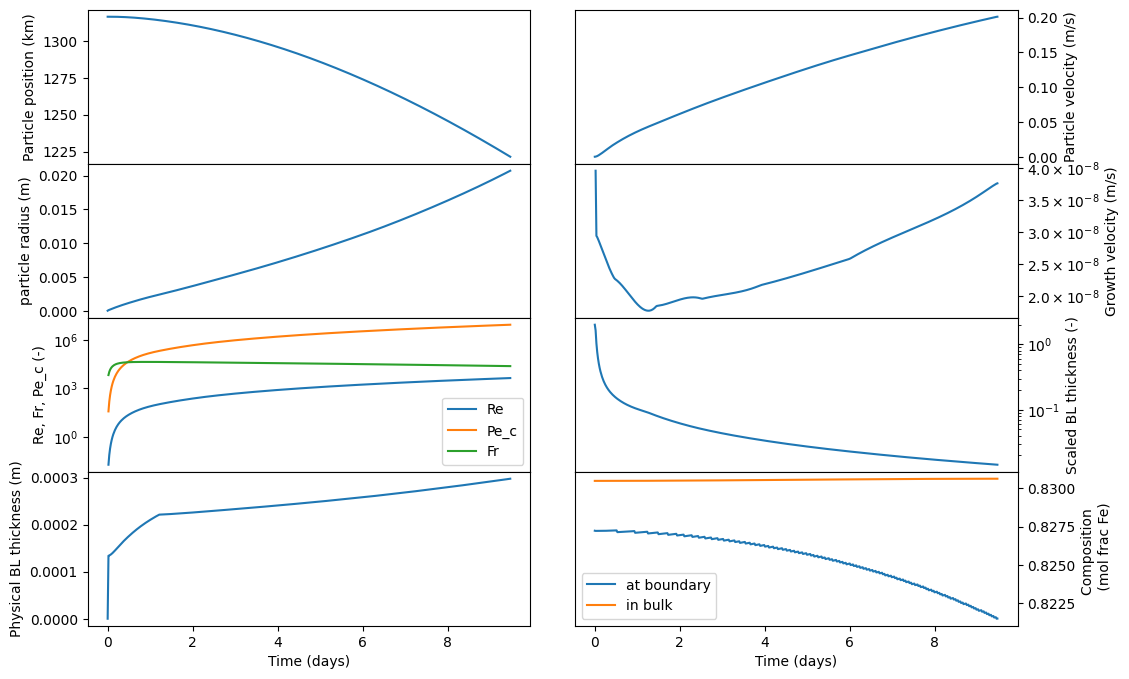

In [7]:
particle_evolution.plot_particle_evolution_time(data["solutions"][47], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

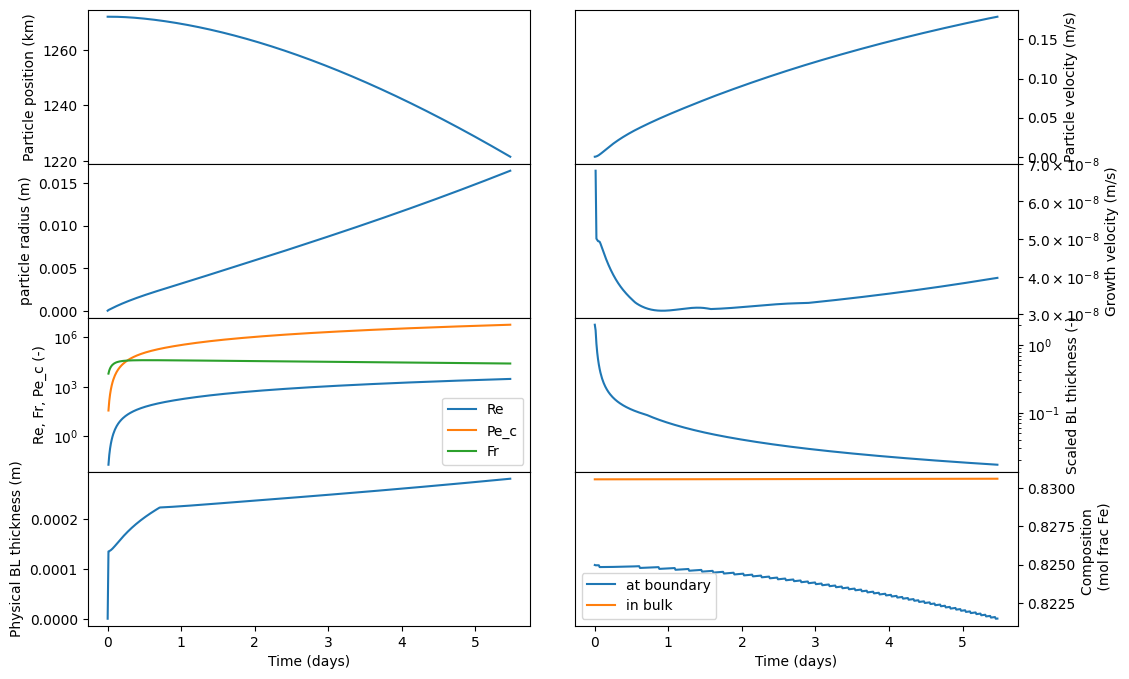

In [8]:
particle_evolution.plot_particle_evolution_time(data["solutions"][25], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])